In [53]:
# load all the necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np 

In [54]:
# load the dataset
iris_dataset = pd.read_csv('data\\IRIS.csv')

# print the ds to the screen 
iris_dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [55]:
# here replce the string to some label
# iris setosa 0
# iris versicolor 1
# iris virginica 2

iris_dataset.species.replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica': 2}, inplace=True)

# check
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0, 0.5, 'Target class')

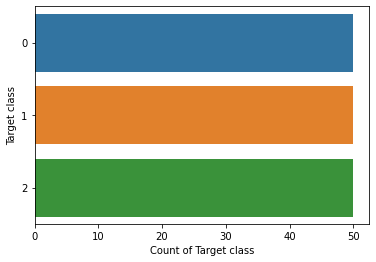

In [56]:
# count the data
sns.countplot(y=iris_dataset.species, data=iris_dataset)
plt.xlabel("Count of Target class")
plt.ylabel("Target class")

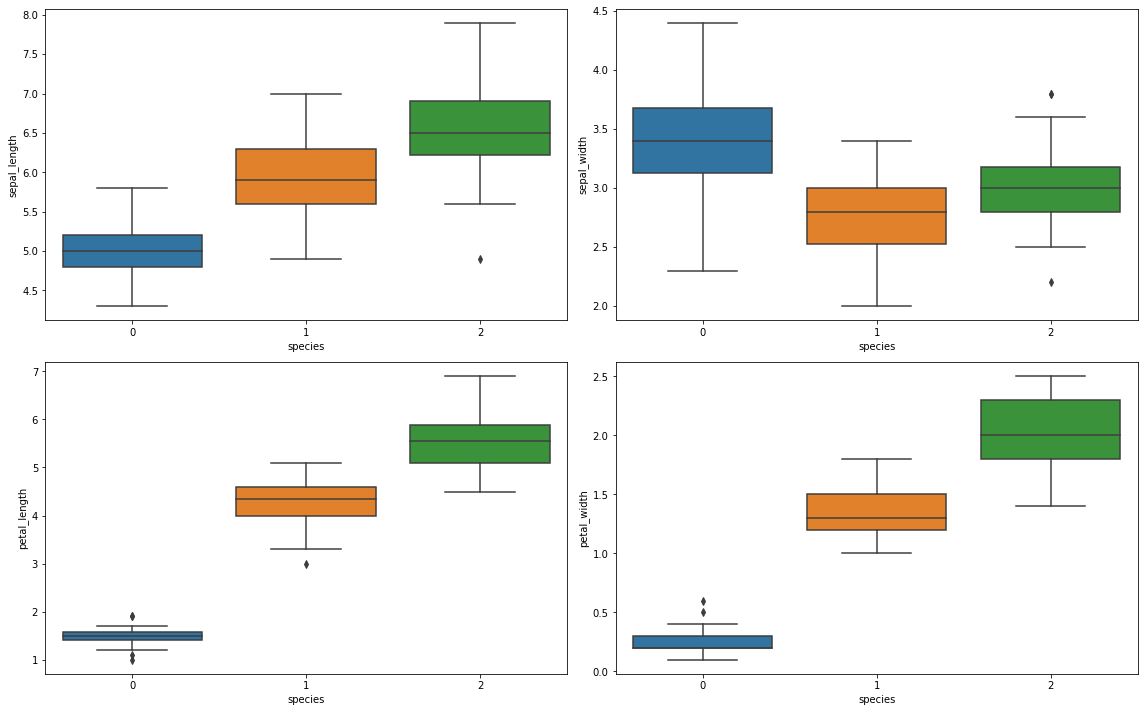

In [57]:
# plots
fix, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
row = 0
col = 0

for i in range(len(iris_dataset.columns) -1):
    if col > 1:
        row += 1
        col = 0 
    axes = ax[row, col]
    sns.boxplot(x=iris_dataset['species'], y= iris_dataset[iris_dataset.columns[i]],ax=axes)
    col += 1
plt.tight_layout()
plt.show()


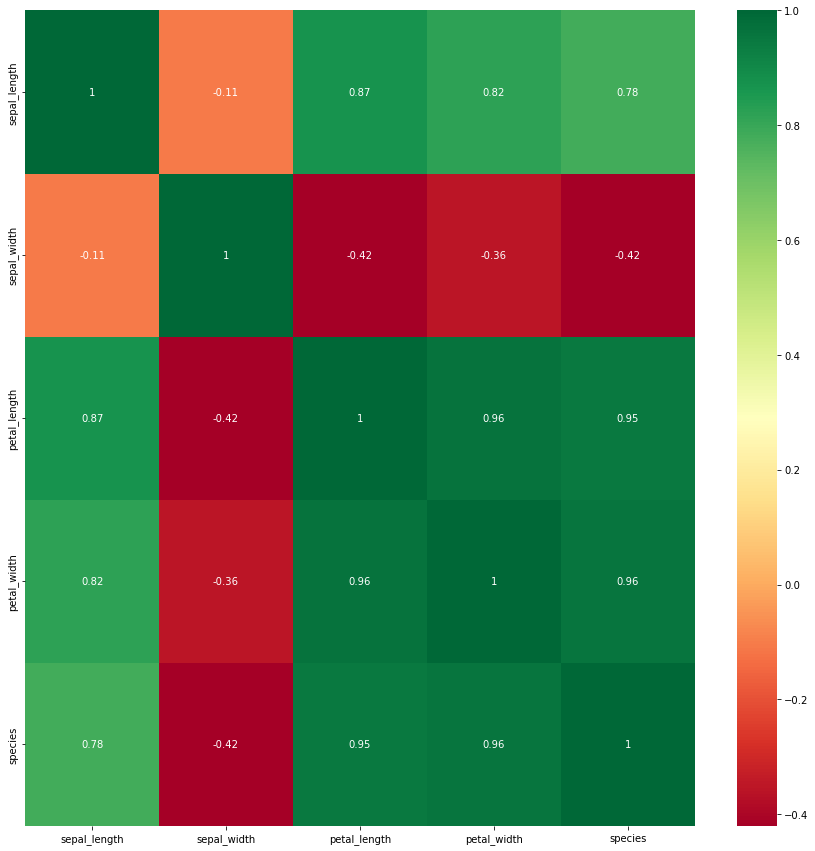

In [58]:
plt.figure(figsize=(15,15))
p = sns.heatmap(iris_dataset.corr(), annot=True, cmap='RdYlGn')

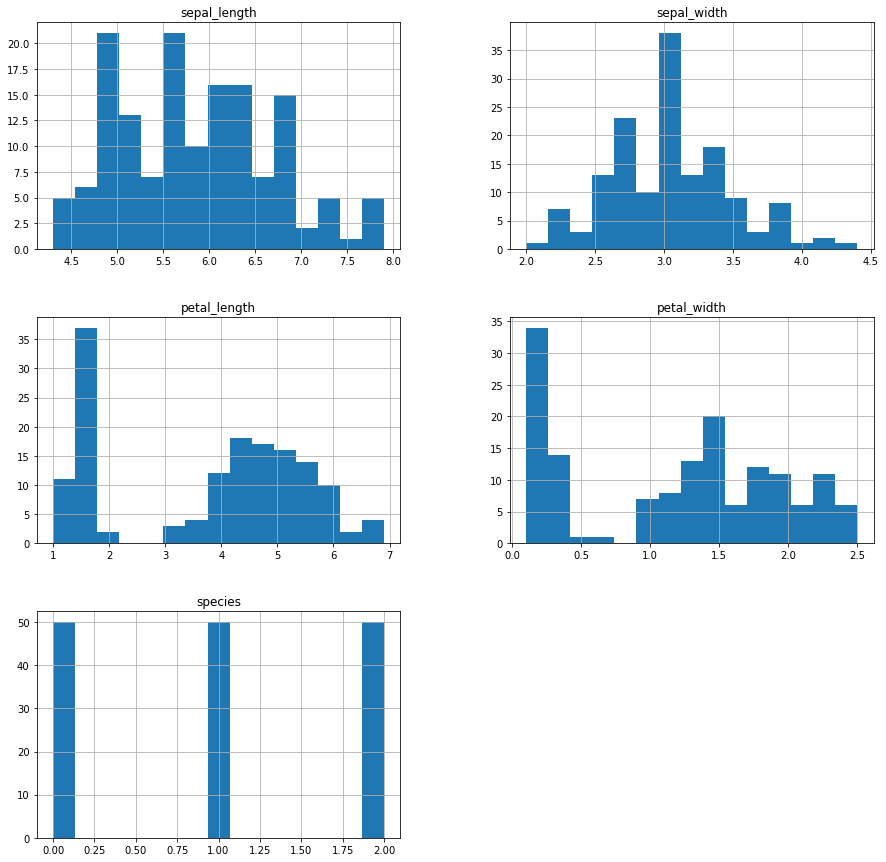

In [59]:
#show distribution
iris_dataset.hist(figsize=(15,15), bins=15)
plt.title("Features distribution")
plt.show()

In [60]:
# let s split the ds in X and y 
#now I create the X and the y 
X = iris_dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = iris_dataset['species'].values

In [62]:
# do the pca
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

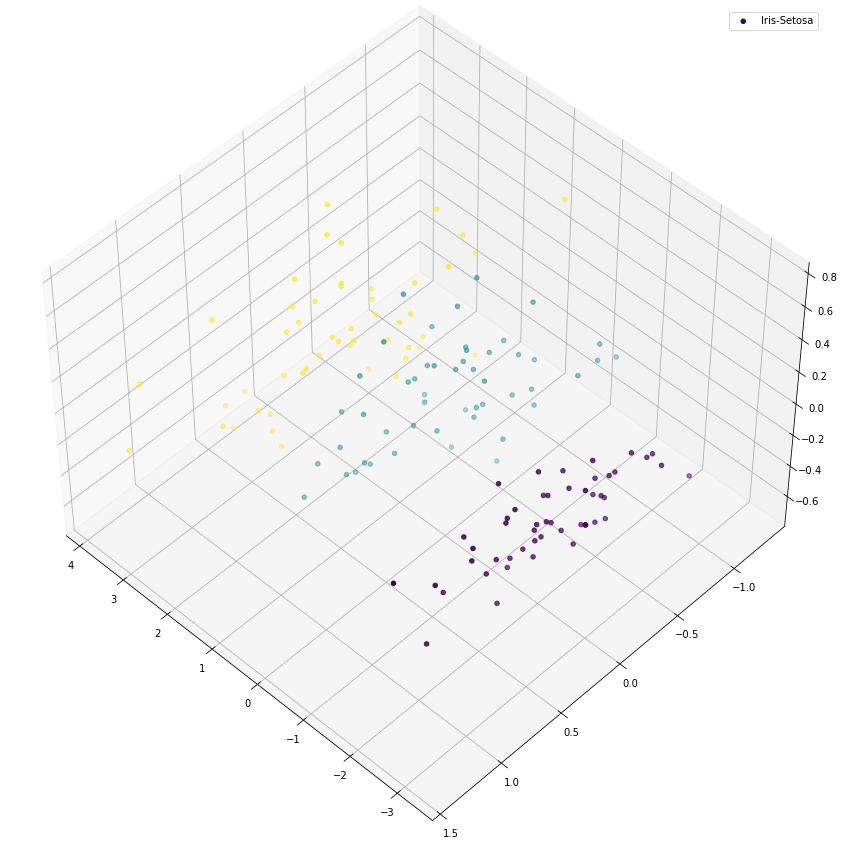

In [63]:
fig = plt.figure(1, figsize=(15,15))
plt.clf()
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y)
ax.legend(labels=['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica'])

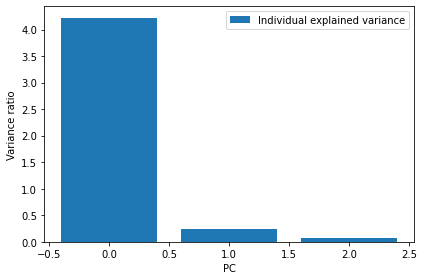

In [64]:
explained_variance = pca.explained_variance_
plt.bar(range(3), explained_variance, align='center', label='Individual explained variance')
plt.xlabel('PC')
plt.ylabel('Variance ratio')
plt.legend(loc='best')
plt.tight_layout()

In [65]:
# instance of kfold 
kfold = StratifiedKFold(n_splits=5, shuffle=False)
kfold.get_n_splits(X_pca, y)
folds = list(kfold.split(X_pca,y))

In [66]:
final_pred = list()
final_true = list() 

for foldcounter, (train_idx, validation_idx) in enumerate(folds):
    print(f"[FOLD {foldcounter}]")
    X_train = X_pca[train_idx]
    y_train = y[train_idx]
    X_test = X_pca[validation_idx]
    y_test = y[validation_idx]

    # generate the classifier
    classifier = KNeighborsClassifier(n_neighbors=7)
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)

    final_pred.append(prediction)
    final_true.append(y_test)

# make array out of prediction
final_pred = np.array(final_pred).reshape((-1,))
final_true = np.array(final_true).reshape((-1,))

[FOLD 0]
[FOLD 1]
[FOLD 2]
[FOLD 3]
[FOLD 4]


The accuracy score is 97.33333333333334%


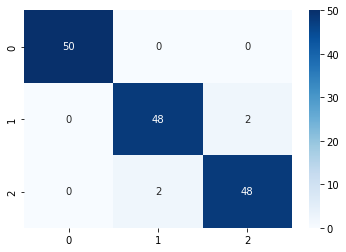

In [67]:
#create a cm
cm = confusion_matrix(final_true, final_pred)
sns.heatmap(cm, annot=True, cmap='Blues')

# accuracy calculation
acc = accuracy_score(final_true, final_pred) * 100 
print(f"The accuracy score is {acc}%")